In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [6]:
df_train = pd.read_csv('../input/train_data/train_data.csv', sep=',')
df_test = pd.read_csv('../input/test_data/test_data.csv', sep=',')

In [143]:
col = ['op_setting_1', 'op_setting_2',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17',
       'sensor_18', 'sensor_20', 'sensor_21']
mean = df_train.mean()
std = df_train.std()

def preprocess(df, norm=True, rul=False):
    X = pd.DataFrame()
    X['engine_no'] = df['engine_no']
    X['time_in_cycles'] = df['time_in_cycles']
    if norm:
        for c in col:
            X[c] = (df[c] - mean[c])/std[c]
    else:
        for c in col:
            X[c] = df[c]
    if 'RUL' in df.columns:
        if rul:
            X['RUL'] = df['RUL']
        y = (df['RUL']<100).astype(int)
    else:
        y=None
    return X, y

In [81]:
X, y = preprocess(df_train)

In [82]:
eng_un = X['engine_no'].unique()
series = {}
for i in eng_un:
    series[i] = X[X['engine_no']==i]

In [117]:
n=5

def get_windows(df, n, y=None):
    w = []
    c = [x + '_' + str(i) for i in range(n) for x in df.columns]
    if y is not None:
        c.append('GonnaFail')
    l = len(df)
    for i in range(l-n+1):
        d = df.iloc[i:i+n]
        a = d.values
        a = a.flatten().tolist()
        if y is not None:
            a.append(max(y[i:i+n]))
        w.append(a)
    eng = ['engine_no_' + str(i) for i in range(n)]
    time=['time_in_cycles_' + str(i) for i in range(n)]
    new_df = pd.DataFrame(w, columns=c)
    new_df=new_df.drop(columns=eng[1:])
    new_df=new_df.drop(columns=time[1:])
    return new_df, y
        


In [121]:
def test(df, y):
    model = RandomForestClassifier()
    X = df.drop(columns=['GonnaFail'])
    y = df['GonnaFail']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

In [118]:
df = get_windows(series[0], 1, y)

In [122]:
x, y = get_windows(series[0], 1, y)
test(x, y)

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [328]:
X, y = preprocess(df_train, rul=True, norm=False)

In [148]:
eng_un = X['engine_no'].unique()
series = {}
for i in eng_un:
    series[i] = X[X['engine_no']==i]

In [326]:
l = []
for i, df in series.items():
    cor = [i]
    cor += df[df['RUL']>100].corr()['time_in_cycles'].tolist()[2:-1]
    l.append(cor)
l=np.array(l)
l.shape
l

array([[ 0.00000000e+00, -3.87815593e-02, -6.66934965e-02, ...,
         6.48277006e-02,  5.43056410e-02,  5.38256202e-02],
       [ 1.00000000e+00, -4.08694311e-02, -1.58405313e-02, ...,
         2.83744920e-02,  5.07966151e-02,  5.23398083e-02],
       [ 2.00000000e+00, -1.05505729e-01, -1.76253353e-01, ...,
         1.40071784e-01,  1.26131941e-01,  1.28611800e-01],
       ...,
       [ 7.06000000e+02, -1.88426763e-02, -2.84792902e-03, ...,
         0.00000000e+00, -2.49196326e-01, -2.86427535e-01],
       [ 7.07000000e+02,  2.52738203e-03, -1.19325062e-03, ...,
         1.96941797e-02,  1.11812760e-02,  9.94142366e-03],
       [ 7.08000000e+02, -2.33135649e-01, -1.84265348e-01, ...,
         2.44618548e-01,  2.84654516e-01,  2.86916114e-01]])

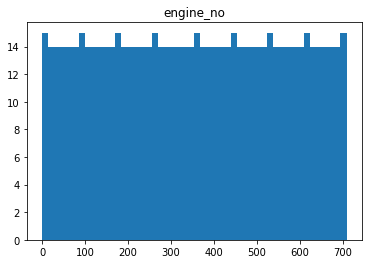

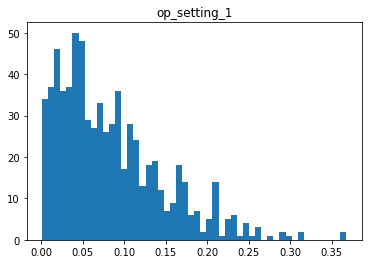

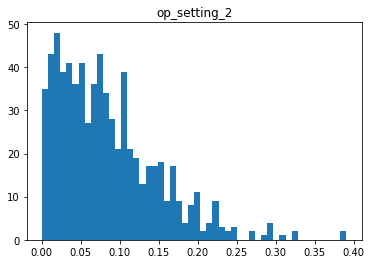

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


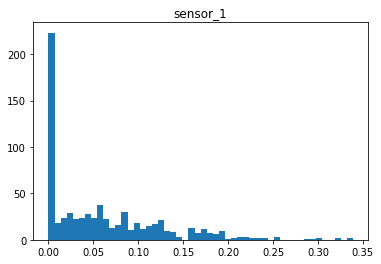

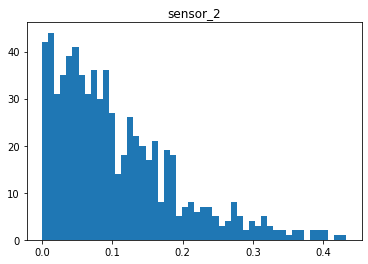

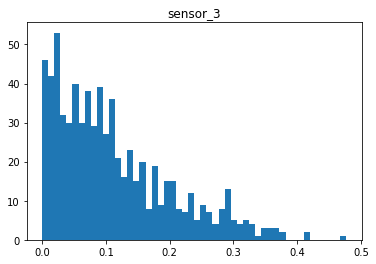

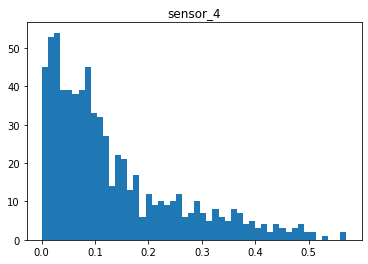

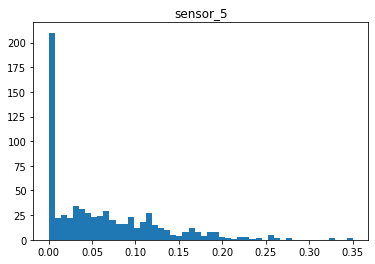

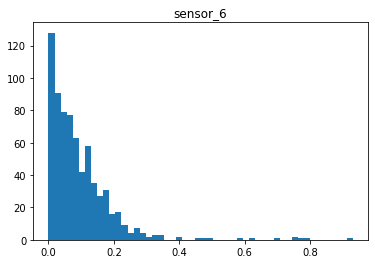

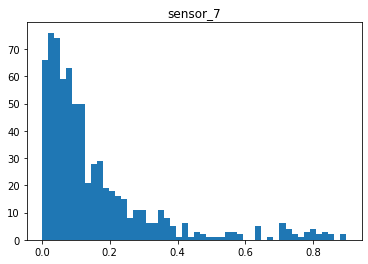

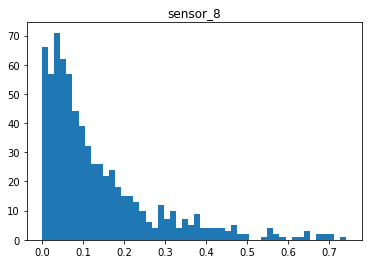

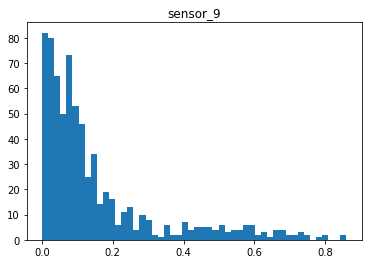

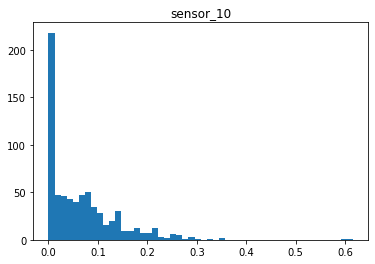

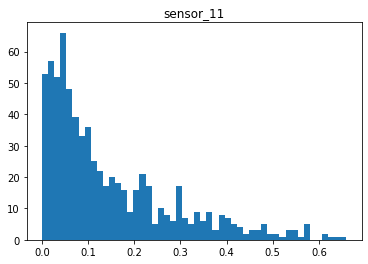

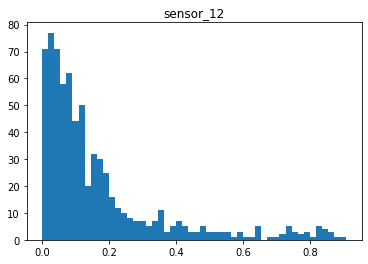

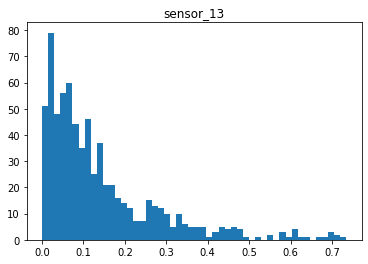

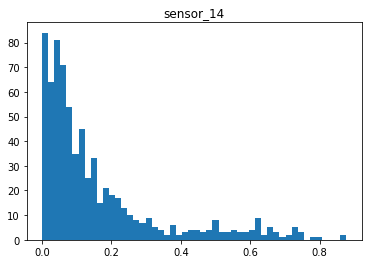

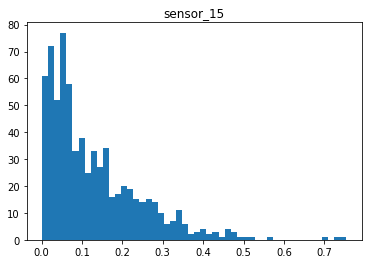

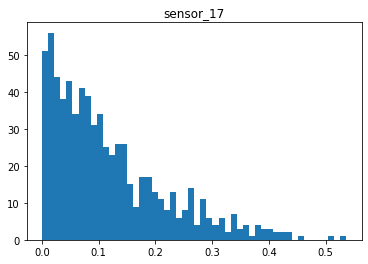

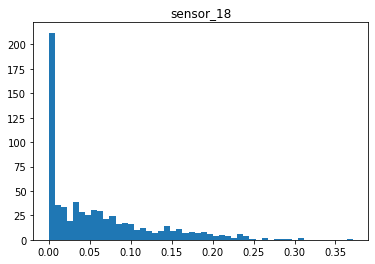

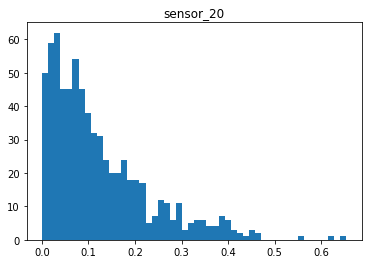

In [327]:
c = 'engine_no', 'op_setting_1', 'op_setting_2', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_18', 'sensor_20', 'sensor_21',
for i in range(21):
    plt.hist(np.abs(l[:, i]), bins=50)
    plt.title(c[i])
    plt.show()

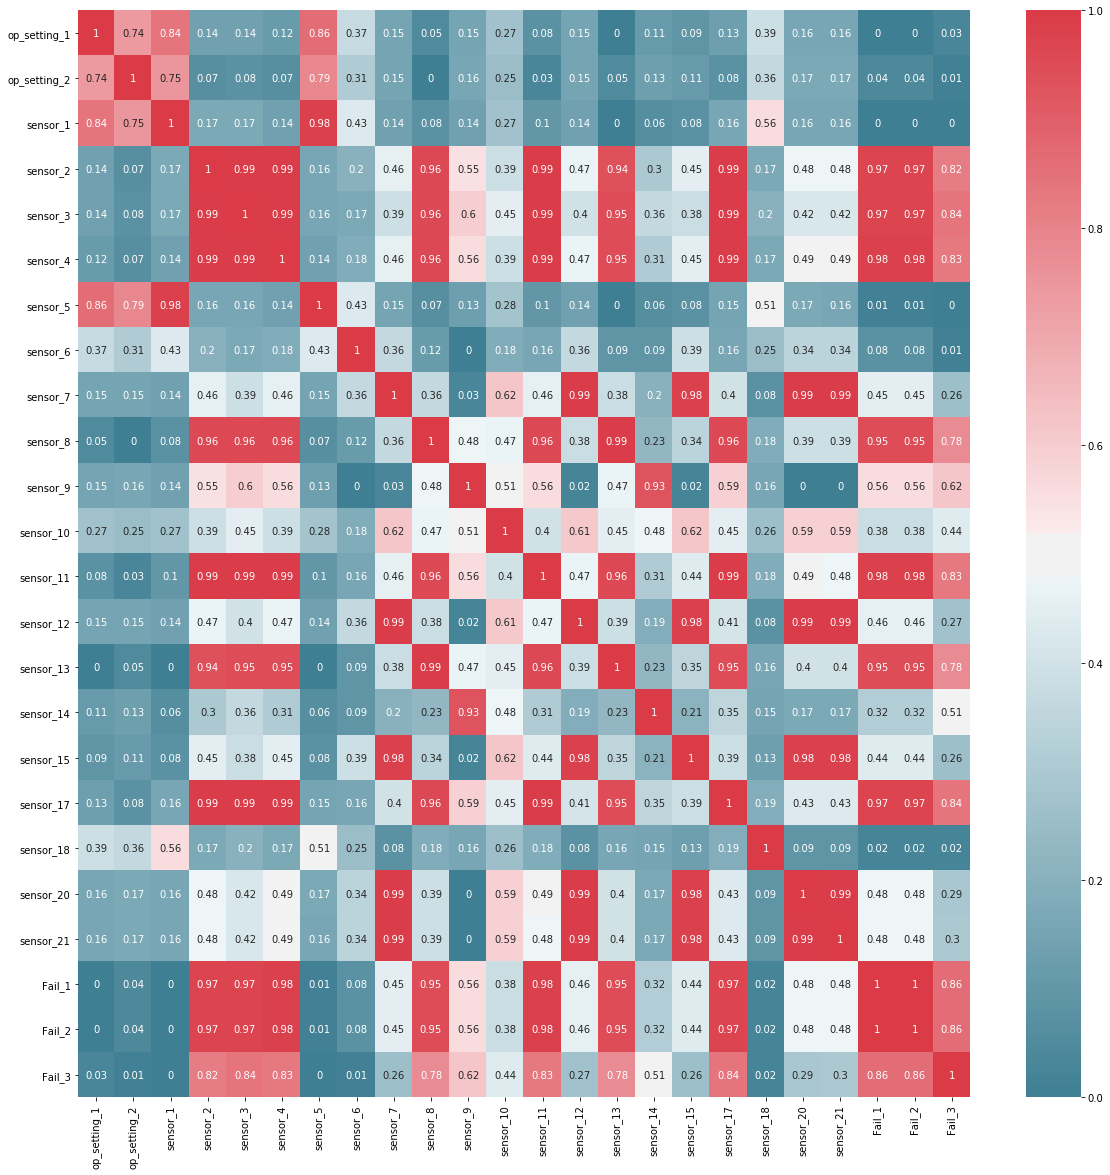

In [239]:
corr = np.abs(df_cor.corr())
corr = (corr*100).astype(int)/100
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True)

In [296]:
df_cor = pd.DataFrame(l, columns=c)
df_cor=df_cor.dropna()

l_1 = [2, 3, 4, 8, 11, 13, 17]
l_2 = [7, 12, 20, 21, 15]
l_3 = [9, 10, 14]

def fail(l, df_cor, threshold=0.4):
    c= 0
    for i in l:
        name = 'sensor_'+str(i)
        c += (np.abs(df_cor[name])>threshold).astype(int)
    b = (c/len(l)>0.5).astype(int)
    return b

#df_cor['Fail_1'] = fail(l_1, df_cor)
#df_cor['Fail_2'] = fail(l_2, df_cor)
#df_cor['Fail_3'] = fail(l_3, df_cor)


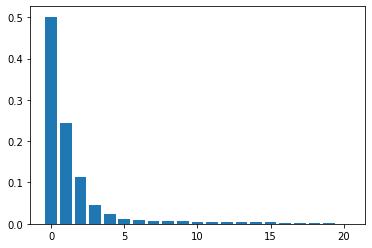

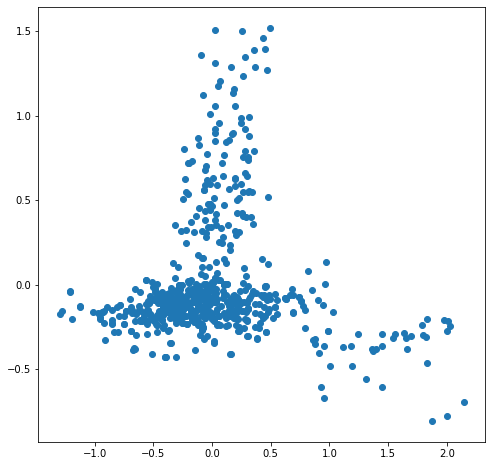

In [297]:
pca = PCA()
cor_pca = pca.fit_transform(df_cor)
expl = pca.explained_variance_ratio_
plt.bar(range(len(expl)), expl)
plt.show()
plt.figure(figsize=(8, 8))
plt.scatter(cor_pca[:,0], cor_pca[:,1])

In [298]:
from sklearn.cluster import KMeans

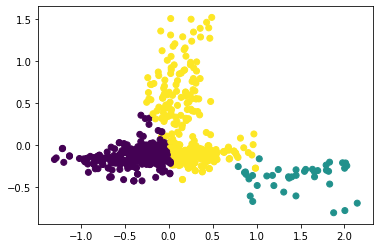

In [301]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(df_cor)
plt.scatter(cor_pca[:,0], cor_pca[:,1], c=y_pred)

(709, 21)
(709, 21)


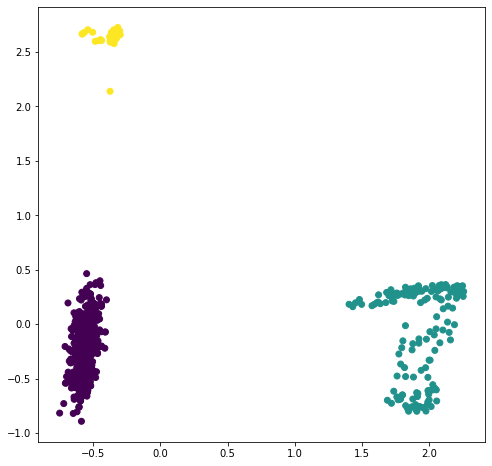

In [325]:
l_all = []
for i, df in series.items():
    l_all.append(df.corr()['time_in_cycles'].tolist()[2:-1])
l_all=np.array(l_all)
l_all = pd.DataFrame(l_all, columns=c).fillna(0)
print(l_all.shape)

l_early = []
for i, df in series.items():
    l_early.append(df[df['RUL']>100].corr()['time_in_cycles'].tolist()[2:-1])
l_early=np.array(l_early)
l_early = pd.DataFrame(l_early, columns=c).fillna(0)
print(l_early.shape)

kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(l_all)

cor_pca = pca.fit_transform(l_early)

expl = pca.explained_variance_ratio_
plt.bar(range(len(expl)), expl)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(cor_pca[:,0], cor_pca[:,1], c=y_pred)